# Setting up environment

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,auc 
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.metrics import accuracy_score

# Process and split data

Show Sample Of Data

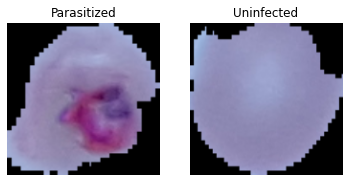

In [6]:
data1 = cv2.imread("E:\\FCAI\\Project\\project_selected\\cell_images\\Parasitized\\C39P4thinF_original_IMG_20150622_105102_cell_83.png") #parasitized malari cell path and call one image
data1 = cv2.resize(data1,(160,160)) 
plt.subplot(1,2,1)
plt.imshow(data1)
plt.axis("off")
plt.title("Parasitized")
data1 = cv2.imread("E:\\FCAI\\Project\\project_selected\\cell_images\\Uninfected\\C1_thinF_IMG_20150604_104722_cell_15.png") #uninfected malari cell path and call one image
data1 = cv2.resize(data1,(160,160))
plt.subplot(1,2,2)
plt.imshow(data1)
plt.axis("off")
plt.title("Uninfected")
plt.show()

Read All Data And Resize All Image

In [7]:
x = list() 
y = list() 
for i in os.listdir("E:\\FCAI\\Project\\project_selected\\cell_images\\Parasitized"):  
    if ".png" in i: 
        path = "E:\\FCAI\\Project\\project_selected\\cell_images\\Parasitized\\"+i 
        img = plt.imread(path) 
        img = cv2.resize(img,(40,40)) 
        x.append(img) 
        y.append(1) 
for i in os.listdir("E:\\FCAI\\Project\\project_selected\\cell_images\\Uninfected"):
    if ".png" in i:
        path = "E:\\FCAI\\Project\\project_selected\\cell_images\\Uninfected\\"+i
        img = plt.imread(path)
        img = cv2.resize(img,(40,40))
        x.append(img)
        y.append(0)
x = np.array(x)  

# Data Preparation

In [8]:
x = x.reshape(x.shape[0],x.shape[1]*x.shape[2]*x.shape[3])
x = x**8

Scalling Data

In [9]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
x = scaler.fit_transform(x)

split the data to train(80%), validation(10%) and test(10%)

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=8)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1111,random_state= 8)

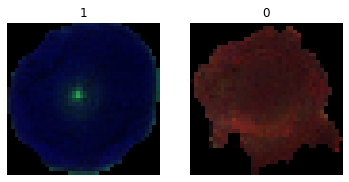

In [11]:
img1 =x_train[970].reshape(40,40,3) #reshape for normal image shape
img2 =x_train[100].reshape(40,40,3)
plt.subplot(1,2,1)
plt.imshow(img1)
plt.axis("off")
plt.title(y_train[900])
plt.subplot(1,2,2)
plt.imshow(img2)
plt.axis("off")
plt.title(y_train[100])
plt.show()

# ANN Model

In [12]:
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1])) # firt hidden layer 
    classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) 
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier 

In [13]:
model = build_classifier()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                307264    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 314,593
Trainable params: 314,593
Non-trainable params: 0
_________________________________________________________________


In [14]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
fitting  = classifier.fit(x_train,y_train)

C:\Users\COMPUT~1.HOU\AppData\Local\Temp/ipykernel_10092/906469520.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)


Epoch 1/100
689/689 [==============================] - 5s 5ms/step - loss: 0.6259 - accuracy: 0.6518
Epoch 2/100
689/689 [==============================] - 4s 5ms/step - loss: 0.5857 - accuracy: 0.6830
Epoch 3/100
689/689 [==============================] - 3s 5ms/step - loss: 0.5675 - accuracy: 0.6975
Epoch 4/100
689/689 [==============================] - 3s 5ms/step - loss: 0.5492 - accuracy: 0.7108
Epoch 5/100
689/689 [==============================] - 3s 5ms/step - loss: 0.5353 - accuracy: 0.7223
Epoch 6/100
689/689 [==============================] - 3s 5ms/step - loss: 0.5198 - accuracy: 0.7335
Epoch 7/100
689/689 [==============================] - 4s 5ms/step - loss: 0.5071 - accuracy: 0.7426
Epoch 8/100
689/689 [==============================] - 3s 5ms/step - loss: 0.4954 - accuracy: 0.7494
Epoch 9/100
689/689 [==============================] - 3s 5ms/step - loss: 0.4828 - accuracy: 0.7572
Epoch 10/100
689/689 [==============================] - 3s 5ms/step - loss: 0.4704 - accura

In [15]:
y_pred=classifier.predict(x_test)

87/87 [==============================] - 1s 3ms/step


In [19]:
print('Accuracy Score: ', round(accuracy_score(y_test,y_pred),2))

Accuracy Score:  0.73


In [20]:
y_pred=classifier.predict(x_val)

87/87 [==============================] - 0s 4ms/step


In [22]:
print('Accuracy Score: ', round(accuracy_score(y_val,y_pred), 2))

Accuracy Score:  0.74


###### classification report

In [23]:
pred = classifier.predict(x_test)
x_labels = (pred > 0.5).astype(np.int)
print(classification_report(y_test, x_labels))

87/87 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1377
           1       0.73      0.72      0.72      1379

    accuracy                           0.73      2756
   macro avg       0.73      0.73      0.73      2756
weighted avg       0.73      0.73      0.73      2756



C:\Users\COMPUT~1.HOU\AppData\Local\Temp/ipykernel_10092/1253081144.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_labels = (pred > 0.5).astype(np.int)


###### Train Accuracies

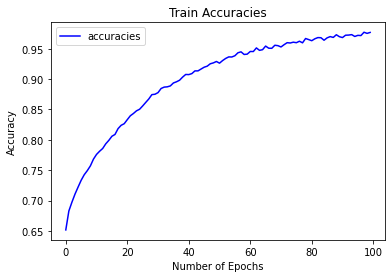

In [24]:
plt.plot(fitting.history['accuracy'], color='b', label="accuracies")
plt.title("Train Accuracies")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

###### Train Loss

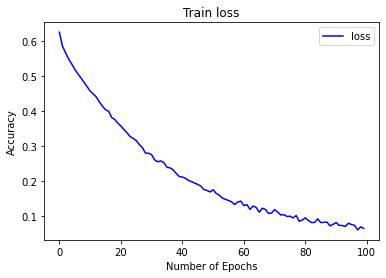

In [25]:
plt.plot(fitting.history['loss'], color='b', label="loss")
plt.title("Train loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

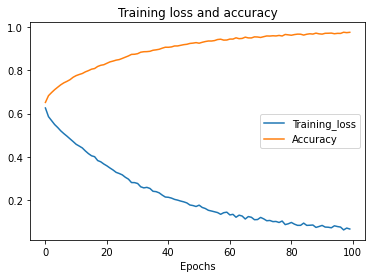

In [26]:
N=100 
plt.plot(np.arange(0,N),fitting.history['loss'],label='Training_loss')
plt.plot(np.arange(0,N),fitting.history['accuracy'],label='Accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.legend(loc='right')

# Visualizing confusion matrix

<AxesSubplot:>

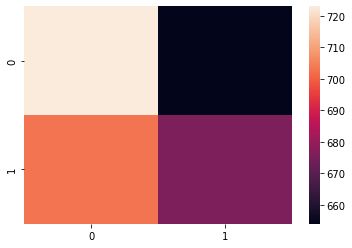

In [27]:
cm = confusion_matrix(y_test, y_pred)
cm
sns.heatmap(cm)

# ROC Curve 

In [28]:
fpr_keras, tpr_keras, thresholds = roc_curve(y_test, x_labels)
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

0.7264202165167628

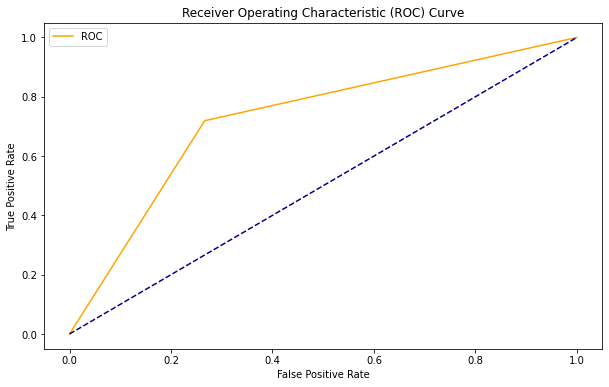

In [29]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr_keras, tpr_keras)